In [0]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

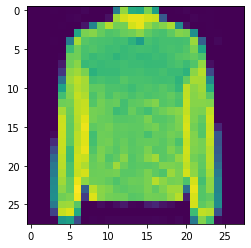

In [9]:
import matplotlib.pyplot as plt
images,label = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())

tensor([4, 5, 0, 2, 8, 6, 6, 4, 7, 4, 5, 4, 0, 0, 4, 9, 6, 8, 9, 9, 2, 4, 5, 8,
        2, 3, 8, 4, 6, 1, 9, 5, 1, 7, 5, 7, 7, 7, 8, 7, 8, 3, 2, 3, 3, 3, 0, 7,
        5, 6, 1, 5, 9, 7, 9, 2, 8, 3, 7, 1, 4, 4, 7, 0])


In [0]:
#building a network
from torch import nn,optim
import torch.nn.functional as F

In [0]:
model = nn.Sequential(
                    nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1)
)
#defining the loss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [0]:
model
%config IPCompleter.greedy=True

In [13]:
#training the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        output = model(images)
        loss = criterion(output,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+= loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
#after the completion of the for loop it goes to the else block

Training loss: 0.5000063580458861
Training loss: 0.3840057188069134
Training loss: 0.34913164706054783
Training loss: 0.32833954662497616
Training loss: 0.31627746233776177


Predicted score for correct label : 0.987906813621521


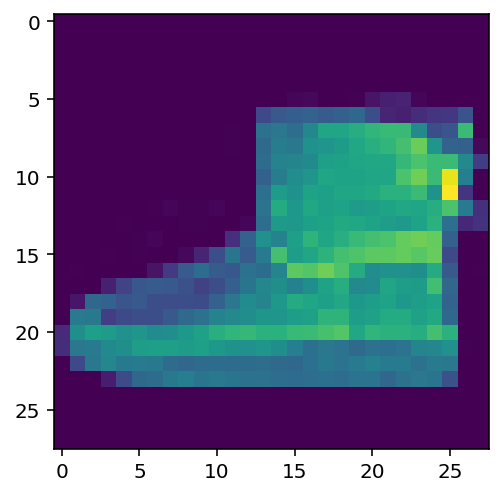

In [35]:
#plotting the results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


dataiter = iter(testloader)
images,labels = dataiter.next()
img = images[0]
plt.imshow(img.numpy().squeeze())
img = img.view(img.shape[0],-1)
#as we used log soft max so the porbability calculation
model.eval()
ps = torch.exp(model(img))

print(f"Predicted score for correct label : {ps[0][labels[0]].item()}")